In [10]:
import math
import random
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

A continuación programamos una función que regresa la distancia entre dos puntos, sea $p_1=(x_1,y_1)$ y $p_2=(x_2,y_2)$:
$$d(p_1,p_2)=\sqrt{((x1-x2)^2+(y1-y2)^2}$$

In [4]:
def getLen(x1,y1,x2,y2):
    diff_x = (x1-x2)**2
    diff_y = (y1-y2)**2
    length = math.sqrt(diff_x+diff_y)
    return length

## Circunferencias aleatorias con entre 0 y 100

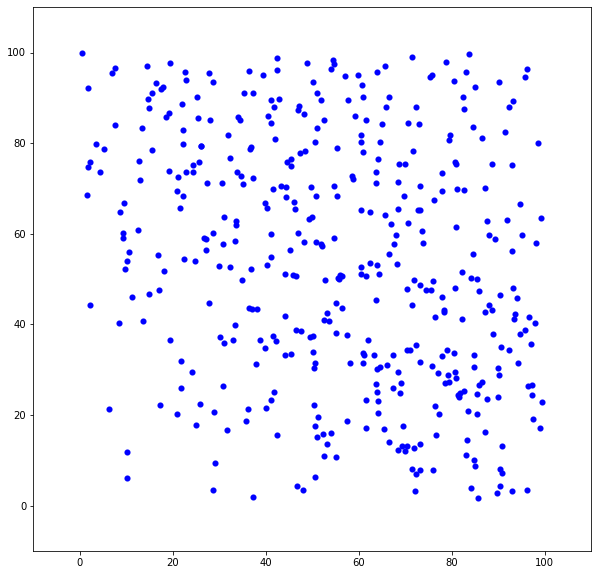

In [8]:
num = 50# numero de circulos
npoints = 5000 # points to chose from
n = 10 # number of points to chose
R = 20 # radius of the circle
a_if=[0,100] #Rango de centros en x
b_if=[0,100] #Rango de centros en y

randProba = lambda a: a/sum(a)
plt.figure(figsize=(10,10))
x_1=[]
y_1=[]
for i in range(num):
    #centro 
    a = a_if[1]*np.random.rand()
    b = b_if[1]*np.random.rand()
    if (a_if[0]< a <a_if[1]) & (b_if[0] < b <b_if[1]):
        x_1.extend([a])
        y_1.extend([b])
        plt.scatter(a,b, color='b', lw=0.1)
    #circunferencia
    puntos = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
    for t in range(len(puntos)): 
        r = R + random.uniform(-R*0.1,R*0.1) #Pertubación 10% del radio
        x1 = a + r * np.cos(t)
        y1 = b + r * np.sin(t)
        if (a_if[0]< x1 <a_if[1]) & (b_if[0] < y1 <b_if[1]):
            x_1.extend([x1])
            y_1.extend([y1])
            plt.scatter(x1, y1, color='b', lw=0.1)
    plt.xlim(0-(R/2),a_if[1]+(R/2))
    plt.ylim(0-(R/2),b_if[1]+(R/2))

In [9]:
distancias_bayes = []
for i in range(len(x_1)):
    for j in range(i,len(y_1)):
        if j != i:
            d = getLen(x_1[i],y_1[i],x_1[j],y_1[j])
            distancias_bayes.append(d)

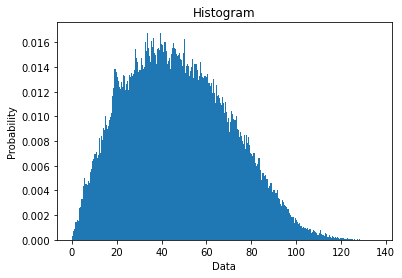

In [11]:
hist_circ = plt.hist(distancias_bayes, density=True, bins=300, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

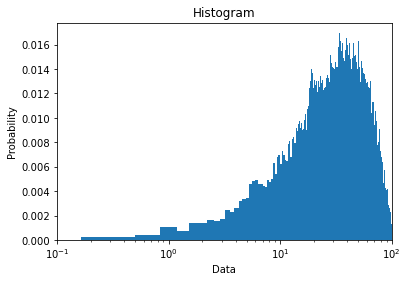

In [12]:
plt.hist(distancias_bayes, density=True, bins=400, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.xscale('log')
plt.xlim(.1,100)
plt.title("Histogram");

### Malla aleatoria
#### Distribución rand

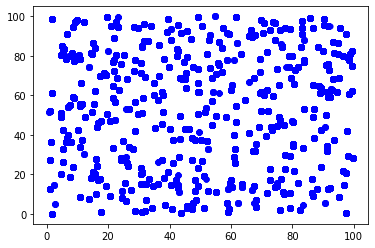

In [14]:
a_if=[0,100] #Rango de centros en x
b_if=[0,100] #Rango de centros en y
X = []
Y = []
for i in range(len(x_1)):
    x = a_if[1]*np.random.rand()
    y = b_if[1]*np.random.rand()
    X.extend([x])
    Y.extend([y])
    plt.scatter(X, Y, color='b', lw=0.1)

In [15]:
distancias_random = []
for i in range(len(X)):
    for j in range(i,len(Y)):
        if j != i:
            d = getLen(X[i],Y[i],X[j],Y[j])
            distancias_random.append(d)

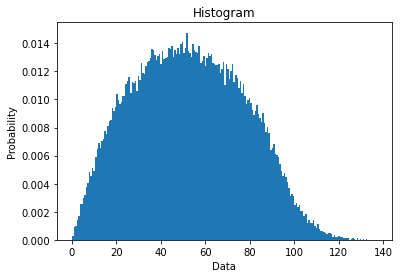

In [16]:
hist_random = plt.hist(distancias_random, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

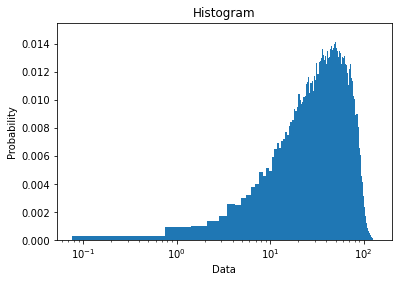

In [17]:
plt.hist(distancias_random, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.xscale('log')
plt.title("Histogram");

#### Distribución normal

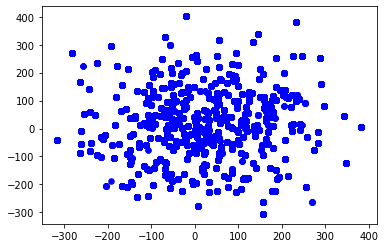

In [31]:
c_if=[20,130] #Rango de centros en x
d_if=[20,130] #Rango de centros en y
Xn = []
Yn = []
for i in range(len(x_1)):
    xn = np.random.normal(c_if[0],c_if[1])
    yn = np.random.normal(d_if[0],d_if[1])
    Xn.extend([xn])
    Yn.extend([yn])
    plt.scatter(Xn, Yn, color='b', lw=0.1)

In [33]:
distancias_random_normal = []
for i in range(len(Xn)):
    for j in range(i,len(Yn)):
        if j != i:
            dnormal = getLen(X[i],Y[i],X[j],Y[j])
            distancias_random_normal.append(dnormal)

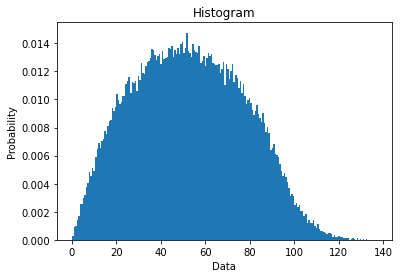

In [35]:
hist_random = plt.hist(distancias_random_normal, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

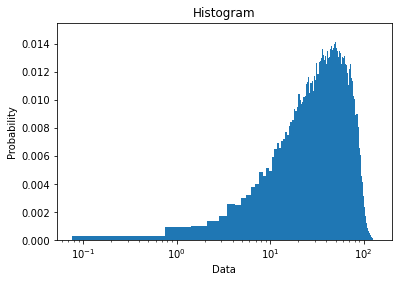

In [36]:
plt.hist(distancias_random_normal, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.xscale('log')
plt.title("Histogram");

# Comparamos
## Circunferncias vs random rand()

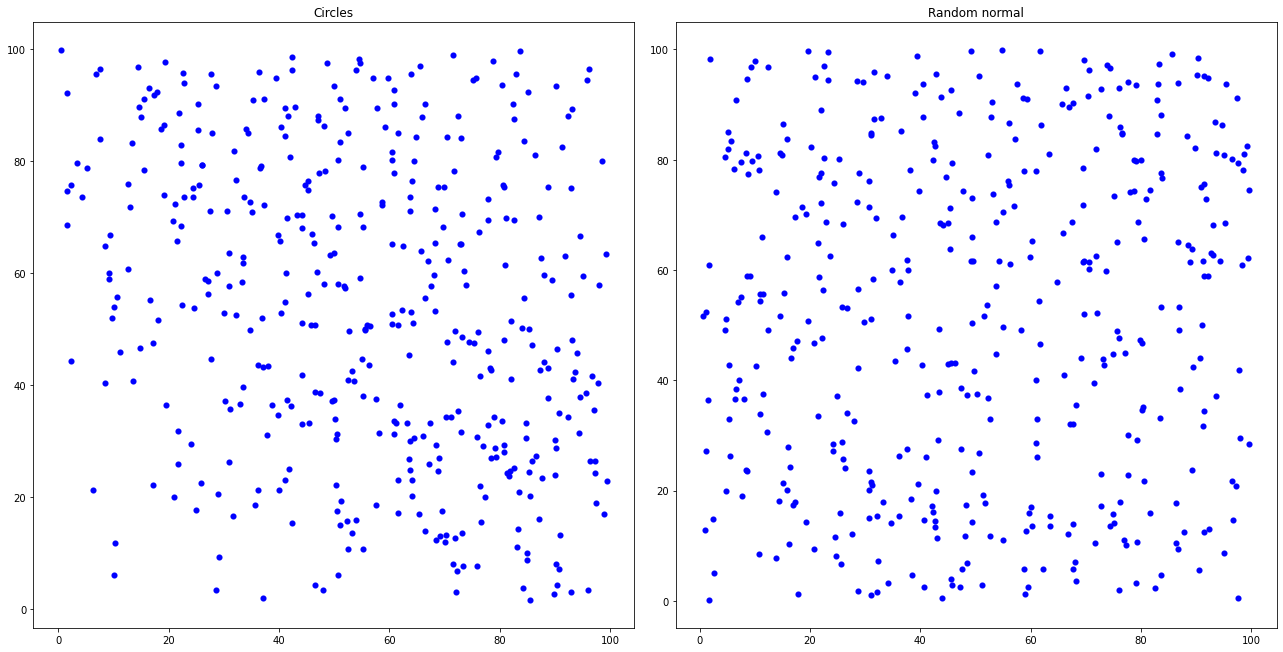

In [22]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(18,9), nrows=1, ncols=2)
plt.tight_layout()
axes_cosmo[0].set_title('Circles')
axes_cosmo[0].scatter(x_1, y_1, color='b', lw=0.1)

axes_cosmo[1].set_title('Random normal')
axes_cosmo[1].scatter(X, Y, color='b', lw=0.1);

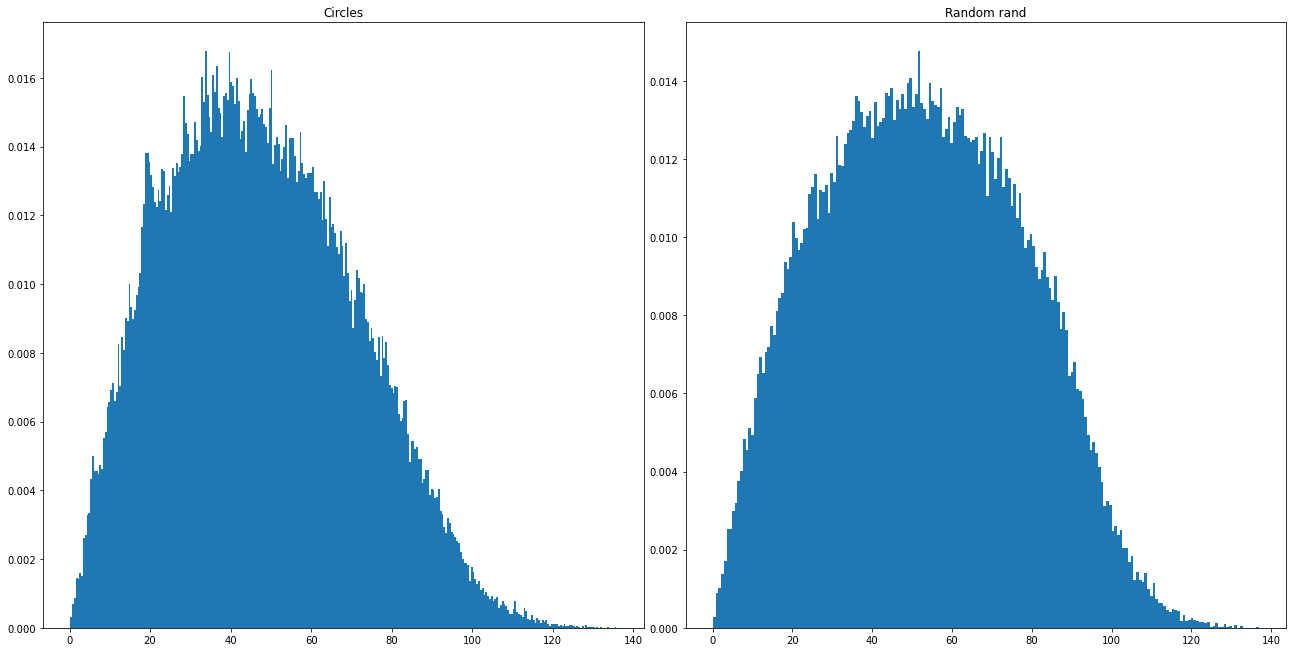

In [37]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(18,9), nrows=1, ncols=2)
plt.tight_layout()
axes_cosmo[0].set_title('Circles')
axes_cosmo[0].hist(distancias_bayes, density=True, bins=300, label="Data")

axes_cosmo[1].set_title('Random rand')
axes_cosmo[1].hist(distancias_random, density=True, bins=200, label="Data");

In [40]:
X_total_rand = x_1.copy()
X_total_rand.extend(X)

Y_total_rand = y_1.copy()
Y_total_rand.extend(Y)

In [41]:
distancias_total_rand = []
for i in range(len(X_total_rand)):
    for j in range(i,len(Y_total_rand)):
        if j != i:
            d = getLen(X_total_rand[i],Y_total_rand[i],X_total_rand[j],Y_total_rand[j])
            distancias_total_rand.append(d)

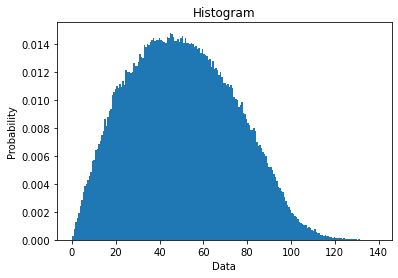

In [42]:
hist_random = plt.hist(distancias_total_rand, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");

## Circunferncias vs random normal()

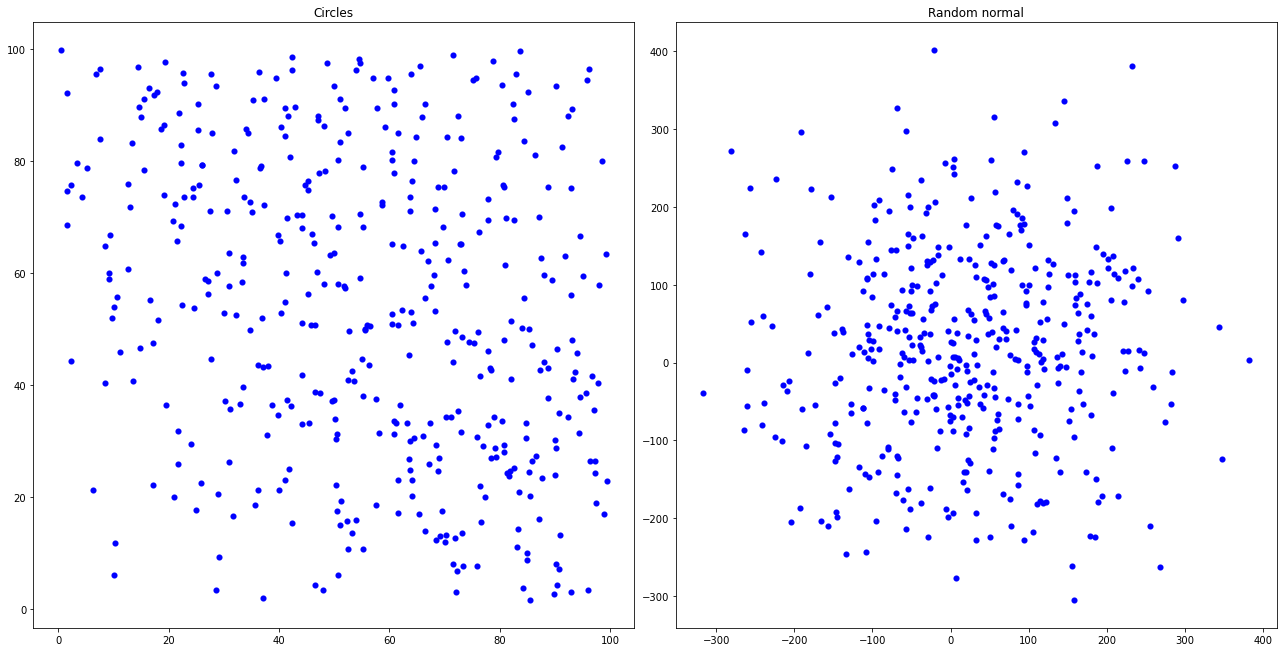

In [39]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(18,9), nrows=1, ncols=2)
plt.tight_layout()
axes_cosmo[0].set_title('Circles')
axes_cosmo[0].scatter(x_1, y_1, color='b', lw=0.1)

axes_cosmo[1].set_title('Random normal')
axes_cosmo[1].scatter(Xn, Yn, color='b', lw=0.1);

In [43]:
X_total_normal = x_1.copy()
X_total_normal.extend(Xn)

Y_total_normal = y_1.copy()
Y_total_normal.extend(Yn)

In [44]:
distancias_total_normal = []
for i in range(len(X_total_normal)):
    for j in range(i,len(Y_total_normal)):
        if j != i:
            d = getLen(X_total_normal[i],Y_total_normal[i],X_total_normal[j],Y_total_normal[j])
            distancias_total_normal.append(d)

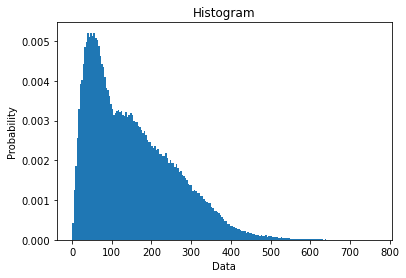

In [45]:
hist_random = plt.hist(distancias_total_normal, density=True, bins=200, label="Data")
plt.ylabel("Probability")
plt.xlabel("Data")
plt.title("Histogram");